In [37]:
%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

In [38]:
popular_df = pd.read_csv("data/popular_data2.csv",encoding="utf-8")



popular_df.rename(columns = {"Unnamed: 0": 'ID',"nrgy":"energy","dnce":"danceability", "dur":"duration", "pop": "popularity"}, inplace = True)
#popular_df.set_index("ID")
popular_df
#popular_df.loc[popular_df["artist"] =="Drake"]


,ID,title,artist,top genre,year,bpm,energy,danceability,dB,live,val,duration,acous,spch,popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [39]:
popular_yr = popular_df.loc[popular_df["year"] >= 2017]
popular_yr

,ID,title,artist,top genre,year,bpm,energy,danceability,dB,live,val,duration,acous,spch,popularity
443,444,Shape of You,Ed Sheeran,pop,2017,96,65,83,-3,9,93,234,58,8,87
444,445,Closer,The Chainsmokers,electropop,2017,95,52,75,-6,11,66,245,41,3,86
445,446,Starboy,The Weeknd,canadian contemporary r&b,2017,186,59,68,-7,14,49,230,14,28,85
446,447,Treat You Better,Shawn Mendes,canadian pop,2017,83,82,44,-4,11,75,188,11,34,84
447,448,That's What I Like,Bruno Mars,pop,2017,134,56,85,-5,9,86,207,1,4,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [40]:
genre = popular_yr["top genre"].value_counts()
genre


top_10 = genre.iloc[0:10]
top_10

dance pop                    76
pop                          23
canadian pop                  9
electropop                    8
edm                           5
canadian contemporary r&b     3
boy band                      3
latin                         3
art pop                       3
big room                      3
Name: top genre, dtype: int64

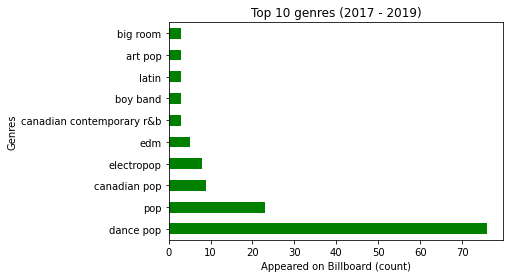

In [41]:
top_10.plot(kind = "barh", facecolor = "green", title = "Top 10 genres (2017 - 2019)") 
plt.xlabel("Appeared on Billboard (count)")
plt.ylabel("Genres")
#plt.tight_layout()
plt.show()

In [42]:
artist = popular_yr["artist"].value_counts()
top_artist = artist.iloc[0:10]
top_artist

The Chainsmokers     7
Ed Sheeran           7
Shawn Mendes         7
Maroon 5             5
Calvin Harris        4
DNCE                 4
Kygo                 4
Justin Timberlake    3
Bruno Mars           3
Dua Lipa             3
Name: artist, dtype: int64

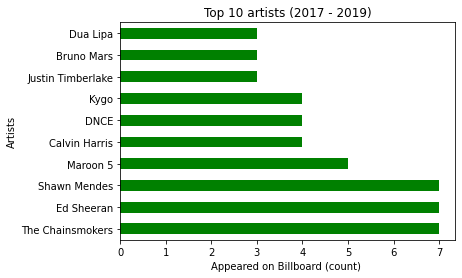

In [43]:
top_artist.plot(kind = "barh", facecolor = "green", title = "Top 10 artists (2017 - 2019)") 
plt.xlabel("Appeared on Billboard (count) ")
plt.ylabel("Artists")
plt.show()
#plt.tight_layout()

In [44]:
song = popular_yr["title"].value_counts()
song

First Time                     2
Kissing Strangers              2
What I Need (feat. Kehlani)    1
Chun-Li                        1
This Town                      1
                              ..
Praying                        1
Mama                           1
Paris                          1
OK - Spotify Version           1
My My My!                      1
Name: title, Length: 158, dtype: int64

In [45]:
s = popular_df.loc[popular_df["artist"] == "Cardi B"]
s

,ID,title,artist,top genre,year,bpm,energy,danceability,dB,live,val,duration,acous,spch,popularity
477,478,Bodak Yellow,Cardi B,pop,2017,125,72,93,-6,35,46,224,7,11,70
510,511,I Like It,Cardi B,pop,2018,136,73,82,-4,37,65,253,10,13,85
570,571,Drip (feat. Migos),Cardi B,pop,2018,130,59,97,-8,8,27,264,5,26,45


In [46]:
#art_gen = pd.merge(top_artist,popular_yr, on = ("artist"), how = "left")
#art_gen
popular_yr
#top_artist = []
art_gen = popular_yr.loc[popular_yr["artist"].isin(top_artist.index.values)] 
#art_gen

In [47]:
top_art_gen = art_gen["top genre"].value_counts()
top_art_gen

pop             15
dance pop       14
electropop       7
canadian pop     7
edm              4
Name: top genre, dtype: int64

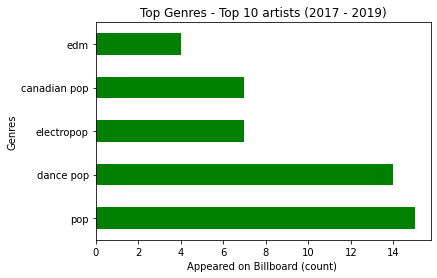

In [48]:
top_art_gen.plot(kind = "barh", facecolor = "green", title = "Top Genres - Top 10 artists (2017 - 2019)") 
plt.xlabel("Appeared on Billboard (count) ")
plt.ylabel("Genres")
plt.show()
#plt.tight_layout()

In [49]:
data = pd.read_csv("data/top10s.csv")
df = pd.DataFrame(data)
df = df.set_index('title')
df = df.drop(columns=['Unnamed: 0', 'top genre', 'artist','dB'])
df.head()

,year,bpm,nrgy,dnce,live,val,dur,acous,spch,pop
title,,,,,,,,,,
"Hey, Soul Sister",2010,97,89,67,8,80,217,19,4,83
Love The Way You Lie,2010,87,93,75,52,64,263,24,23,82
TiK ToK,2010,120,84,76,29,71,200,10,14,80
Bad Romance,2010,119,92,70,8,71,295,0,4,79
Just the Way You Are,2010,109,84,64,9,43,221,2,4,78


In [50]:
group_df = df.groupby('year')

sgroup_df = group_df.median()
count_df = group_df.count()
sgroup_df = sgroup_df.reset_index(drop = False)
print(count_df)

      bpm  nrgy  dnce  live  val  dur  acous  spch  pop
year                                                   
2010   51    51    51    51   51   51     51    51   51
2011   53    53    53    53   53   53     53    53   53
2012   35    35    35    35   35   35     35    35   35
2013   71    71    71    71   71   71     71    71   71
2014   58    58    58    58   58   58     58    58   58
2015   95    95    95    95   95   95     95    95   95
2016   80    80    80    80   80   80     80    80   80
2017   65    65    65    65   65   65     65    65   65
2018   64    64    64    64   64   64     64    64   64
2019   31    31    31    31   31   31     31    31   31


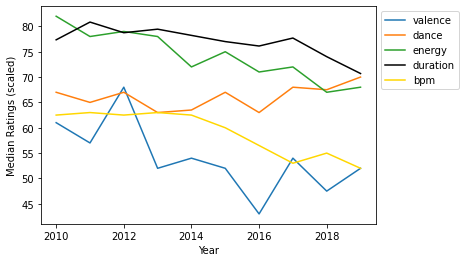

In [51]:
x = sgroup_df['year']
y = sgroup_df['val']
y2 = sgroup_df['dnce']
y3 = sgroup_df['nrgy']
y4 = sgroup_df['dur']*.35
y5 = sgroup_df['bpm']*.5

#generate chart
plt.plot(x, y, label = 'valence')
plt.plot(x,y2, label = 'dance')
plt.plot(x, y3, label = 'energy')
plt.plot(x, y4, label = 'duration', color = 'black')
plt.plot(x, y5, label = 'bpm', color = 'gold')


#labels
plt.xlabel('Year')
plt.ylabel('Median Ratings (scaled)')
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.savefig('data/medianratingsovertime.png')
plt.show()
##songs getting simpler over time?

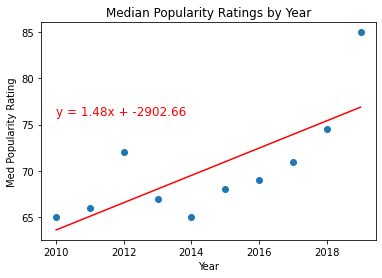

In [52]:
x = sgroup_df['year']
y = sgroup_df['pop']

#regression
(m, b, r, p, std) = linregress(x,y) 
reg = m*x + b
line = 'y = ' + str(round(m,2)) + 'x + ' + str(round(b,2))

#generate plot
plt.scatter(x,y, label = 'pop')
plt.plot(x,reg,'r-')

#labels
plt.xlabel('Year')
plt.ylabel('Med Popularity Rating')
plt.title('Median Popularity Ratings by Year')
plt.annotate(line,(2010,76),fontsize=12,color="red")
plt.savefig('data/medianpopularity.png')
plt.show()
#fewer songs are getting more popular?

In [53]:
usa_df = pd.read_csv("data/US.csv")
korea_df = pd.read_csv("data/KR.csv")
iceland_df = pd.read_csv("data/IS.csv")
australia_df = pd.read_csv("data/AU.csv")
egypt_df = pd.read_csv("data/EG.csv")

In [54]:
usa_df['Country'] = "USA"
korea_df['Country'] = "Korea"
iceland_df['Country'] = "Iceland"
australia_df['Country'] = "Australia"
egypt_df['Country'] = "Egypt"

In [55]:
us_kr_df = usa_df.merge(korea_df, how='outer')
ice_aus_df = iceland_df.merge(australia_df, how='outer')
us_kr_ice_aus_df = us_kr_df.merge(ice_aus_df, how='outer')
world_df = us_kr_ice_aus_df.merge(egypt_df, how='outer')

In [56]:
world_df = world_df.drop(columns=['loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'explicit'])
world_df.head()

,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,key,Country
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,USA
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,USA
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,USA
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,USA
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,USA


In [57]:
def string_split(stringthing):
    try:
        return(stringthing.split('\'')[1].split('\'')[0])
    except:
        return('NA')
world_df['cleaned_artist_id'] = world_df.id_artists.apply(string_split)
world_df.head()

,id,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,key,Country,cleaned_artist_id
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,USA,45tIt06XoI0Iio4LBEVpls
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,USA,14jtPCOoNZwquk5wd9DxrY
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,USA,5LiOoJbxVSAMkBS2fUm3X2
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,USA,5LiOoJbxVSAMkBS2fUm3X2
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,USA,3BiJGZsyX9sJchTqcSA7Su


In [58]:
world_df = world_df.drop(columns=['id_artists'])
world_df.head()

,id,name,popularity,duration_ms,artists,release_date,danceability,energy,key,Country,cleaned_artist_id
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,['Uli'],1922-02-22,0.645,0.4450,0,USA,45tIt06XoI0Iio4LBEVpls
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,USA,14jtPCOoNZwquk5wd9DxrY
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,USA,5LiOoJbxVSAMkBS2fUm3X2
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,USA,5LiOoJbxVSAMkBS2fUm3X2
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,['Dick Haymes'],1922,0.402,0.1580,3,USA,3BiJGZsyX9sJchTqcSA7Su


In [59]:
artist_df = pd.read_csv("data/artists.csv")
artist_df = artist_df.drop(columns=['followers','popularity'])
artist_df['genres'].replace('[]', np.nan, inplace=True)
artist_df.dropna(subset=['genres'], inplace=True)
artist_df = artist_df.rename(columns={"id": "cleaned_artist_id"})
artist_df = artist_df.drop(columns=['name'])
artist_df

,cleaned_artist_id,genres
45,0VLMVnVbJyJ4oyZs2L3Yl2,['carnaval cadiz']
46,0dt23bs4w8zx154C5xdVyl,['carnaval cadiz']
47,0pGhoB99qpEJEsBQxgaskQ,['carnaval cadiz']
48,3HDrX2OtSuXLW5dLR85uN3,['carnaval cadiz']
136,22mLrN5fkppmuUPsHx6i2G,"['classical harp', 'harp']"
...,...,...
1104328,1q9C5XlekzXbRLIuLCDTre,"['social media pop', 'teen pop']"
1104331,4fh2BIKYPFvXFsQLhaeVJp,['la indie']
1104334,7akMsd2vb4xowNTehv3gsY,['indie rockism']
1104336,35m7AJrUCtHYHyIUhCzmgi,['indie rockism']


In [60]:
cleaned_world_df = world_df.merge(artist_df, how='inner')
cleaned_world_df["release_date"] = pd.to_datetime(cleaned_world_df["release_date"],format = '%Y-%m-%d')
year = pd.DatetimeIndex(cleaned_world_df['release_date']).year
cleaned_world_df["Year"] = year
cleaned_world_df.head()

,id,name,popularity,duration_ms,artists,release_date,danceability,energy,key,Country,cleaned_artist_id,genres,Year
0,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']",1922
1,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']",1922
2,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,['Ignacio Corsini'],1922-03-29,0.548,0.0391,6,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']",1922
3,0l3BQsVJ7F76wlN5QhJzaP,El Vendaval - Remasterizado,0,153533,['Ignacio Corsini'],1922-03-21,0.370,0.3720,2,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']",1922
4,0xJCJ9XSNcdTIz0QKmhtEn,La Maleva - Remasterizado,0,181440,['Ignacio Corsini'],1922-03-29,0.339,0.0958,8,USA,5LiOoJbxVSAMkBS2fUm3X2,"['tango', 'vintage tango']",1922


In [62]:
us_data = cleaned_world_df.loc[(cleaned_world_df["Country"] == "USA")]
us_data
avg_us = us_data.groupby(["Year"])["danceability"].mean()
avg_us2 = us_data.groupby(["Year"])["energy"].mean()
#-------------
korea_data = cleaned_world_df.loc[(cleaned_world_df["Country"] == "Korea")]
korea_data
avg_kor = korea_data.groupby(["Year"])["danceability"].mean()
avg_kor2 = korea_data.groupby(["Year"])["energy"].mean()
#-------------
iceland_data = cleaned_world_df.loc[(cleaned_world_df["Country"] == "Iceland")]
iceland_data
avg_ice = iceland_data.groupby(["Year"])["danceability"].mean()
avg_ice2 = iceland_data.groupby(["Year"])["energy"].mean()
#-------------
aus_data = cleaned_world_df.loc[(cleaned_world_df["Country"] == "Australia")]
aus_data
avg_aus = aus_data.groupby(["Year"])["danceability"].mean()
avg_aus2 = aus_data.groupby(["Year"])["energy"].mean()
#-------------
egypt_data = cleaned_world_df.loc[(cleaned_world_df["Country"] == "Egypt")]
#egypt_data
avg_egypt = egypt_data.groupby(["Year"])["danceability"].mean()
avg_egypt2 = egypt_data.groupby(["Year"])["energy"].mean()
#-------------


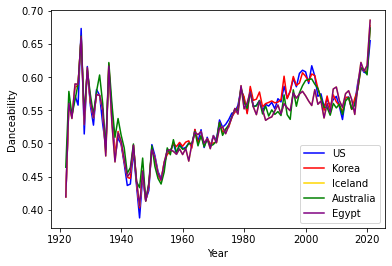

In [63]:
#danceability line plot
us_handle, = plt.plot( avg_us.index.values,avg_us.values,  color='blue', label="US")
korea_handle, = plt.plot(avg_kor.index.values,avg_kor.values,  color='red', label="Korea")
iceland_handle, = plt.plot(avg_ice.index.values,avg_ice.values,  color='gold', label="Iceland")
australia_handle, = plt.plot(avg_aus.index.values,avg_aus.values,  color='green', label="Australia")
egypt_handle, = plt.plot(avg_ice.index.values,avg_ice.values, color='purple', label="Egypt")
plt.legend(loc="lower right")

plt.xlabel("Year")
plt.ylabel("Danceability")
plt.show()

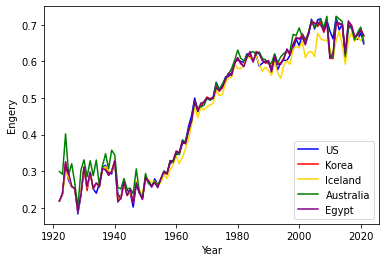

In [64]:
#energy line plot
#avg_us2.plot(kind ="line",color = "green")


us2_handle, = plt.plot( avg_us2.index.values,avg_us2.values, color='blue', label="US")
korea2_handle, = plt.plot(avg_kor2.index.values,avg_kor2.values, color='red', label="Korea")
iceland2_handle, = plt.plot(avg_ice2.index.values,avg_ice2.values, color='gold', label="Iceland")
aus2_handle, = plt.plot(avg_aus2.index.values,avg_aus2.values, color='green', label="Australia")
egypt2_handle, = plt.plot(avg_egypt2.index.values,avg_egypt2.values, color='purple', label="Egypt")

plt.legend(loc="lower right")
plt.xlabel("Year")
plt.ylabel("Engery")
plt.show()

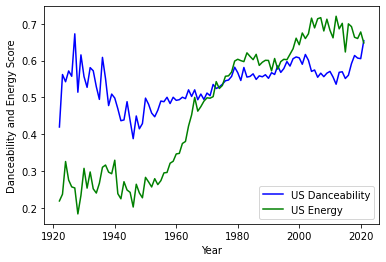

In [65]:
us_handle_2, = plt.plot( avg_us.index.values,avg_us.values,  color='blue', label="US Danceability")
us2_handle, = plt.plot( avg_us2.index.values,avg_us2.values, color='green', label="US Energy")
plt.legend(loc="lower right")

plt.xlabel("Year")
plt.ylabel("Danceability and Energy Score")
plt.show()

In [66]:
# Read the data and the study results
Top200songs_df_path = "Resources/Top200songs.csv"
Top200songs_df = pd.read_csv(Top200songs_df_path, encoding = "utf-8")
Top200songs_df.head(20)

# Converting dtypes using astype
Top200songs_df["Streams"]= Top200songs_df["Streams"].astype(int)
Top200songs_df["Track Name"]= Top200songs_df["Track Name"].astype(str)

# Create a new dataframe that only contains data of U.S.
Top200songs_US = Top200songs_df[Top200songs_df['name'] == "United States"]
Top200songs_US = Top200songs_US.reset_index(drop=True)
Top200songs_US.head(10)

,Track Name,Artist,Streams,URL,Date,name
0,Bad and Boujee (feat. Lil Uzi Vert),Migos,1293486,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2017-01-04,United States
1,Fake Love,Drake,1179471,https://open.spotify.com/track/343YBumqHu19cGo...,2017-01-04,United States
2,Starboy,The Weeknd,1086272,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-04,United States
3,Closer,The Chainsmokers,856349,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-04,United States
4,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,803439,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-04,United States
5,Black Beatles,Rae Sremmurd,770885,https://open.spotify.com/track/6fujklziTHa8uoM...,2017-01-04,United States
6,Bad Things (with Camila Cabello),Machine Gun Kelly,726097,https://open.spotify.com/track/1PSBzsahR2AKwLJ...,2017-01-04,United States
7,Caroline,Aminé,709420,https://open.spotify.com/track/5hTpBe8h35rJ67e...,2017-01-04,United States
8,Bounce Back,Big Sean,704667,https://open.spotify.com/track/0SGkqnVQo9KPytS...,2017-01-04,United States
9,I Feel It Coming,The Weeknd,669820,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-04,United States


In [67]:
#Sort the table by most popular songs and export the resulting table to a new csv
Top200songs_US = Top200songs_US.sort_values(["Streams"], ascending = False)
Top200songs_US.to_csv("Resources/Top200songs_US.csv", index = False)

In [68]:
#Get rid of unuseful data.
Top200songs_US_df = Top200songs_US.drop(['Date','name','URL'],axis = 1)
Top200songs_US_df.head(20)

#Removed duplicate rows because there are many dupliceted track name.
Top200songs_US_groups = Top200songs_US_df.drop_duplicates(subset=['Track Name', 'Artist'], keep='first')

#The most-streamed songs (Top 10) from 01/2017-04/2021
Top200songs_US_groups2 = Top200songs_US_groups.drop(['Artist'],axis = 1)
Top10songs_US = Top200songs_US_groups2.iloc[0:10]
Top10songs_US = Top10songs_US.reset_index(drop=True)
Top10songs_US

,Track Name,Streams
0,Nonstop,5749019
1,drivers license,5723851
2,Survival,5219711
3,Emotionless,4842941
4,God's Plan,4739798
5,Elevate,4686139
6,Mona Lisa (feat. Kendrick Lamar),4444027
7,SAD!,4437612
8,STARGAZING,4244308
9,KOD,4233070


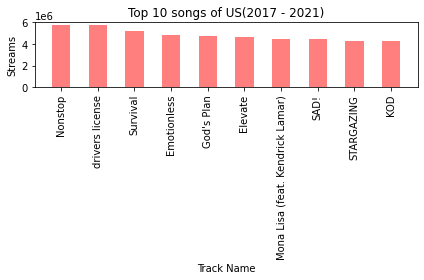

In [69]:
#Set the x_axis ,y_axis and tick locations
x_axis = Top10songs_US['Track Name']
y_axis = Top10songs_US['Streams']
tick_locations = [value for value in x_axis]

#Chart our data, give it a title, and label the axes
plt.bar(x_axis ,y_axis, facecolor = 'r', alpha = 0.5, align = "center", width = 0.5) 

#Give it a title, and label the axes
plt.title( "Top 10 songs of US(2017 - 2021)")
plt.ylabel("Streams")
plt.xlabel("Track Name")

plt.ylim(0, 6000000)
plt.xticks(tick_locations, Top10songs_US['Track Name'], rotation = 'vertical')

# Now we have bar chart of the most-streamed songs (Top 10) from 01/2017-04/2021
plt.tight_layout()
plt.savefig("Images/most-streamed songs.png")
plt.show()

In [70]:
#The most popular artists (Top 10) from 01/2017-04/2021
Top200artists_groups = Top200songs_US_groups.drop(['Track Name','Streams'],axis = 1)
Top200artists_groups = Top200artists_groups.reset_index(drop=True)
Top200artists_counts = pd.value_counts(Top200artists_groups["Artist"])
Top10artists = Top200artists_counts.iloc[0:10]
Top10artists

Taylor Swift    103
Future           92
Drake            88
Trippie Redd     74
Eminem           67
Juice WRLD       66
Lil Uzi Vert     64
Logic            63
XXXTENTACION     61
21 Savage        57
Name: Artist, dtype: int64

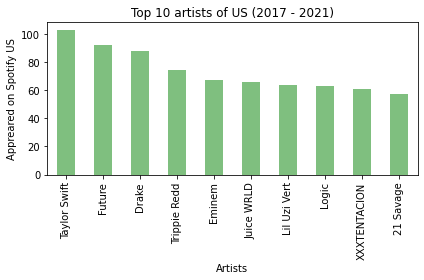

In [71]:
#Chart our data, give it a title, and label the axes
Top10artists.plot(kind = "bar", facecolor = 'green', alpha = 0.5, align = "center", width = 0.5) 

#Give it a title, and label the axes
plt.title( "Top 10 artists of US (2017 - 2021)")
plt.ylabel("Appreared on Spotify US")
plt.xlabel("Artists")

# Now we have bar chart of the most-streamed songs (Top 10) from 01/2017-04/2021
plt.tight_layout()
plt.savefig("Images/most popular artists.png")
plt.show()